In [1]:
pip install matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix

In [3]:
# Load the training dataset
train_data = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\12 Naive Bayes\SalaryData_Train.csv')

In [4]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
# Load the test dataset
test_data = pd.read_csv(r'C:\Amit Dubli\ExcelR\ExcelR assignments & material\Data Science\01 Assignments\12 Naive Bayes\SalaryData_Test.csv')

In [6]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


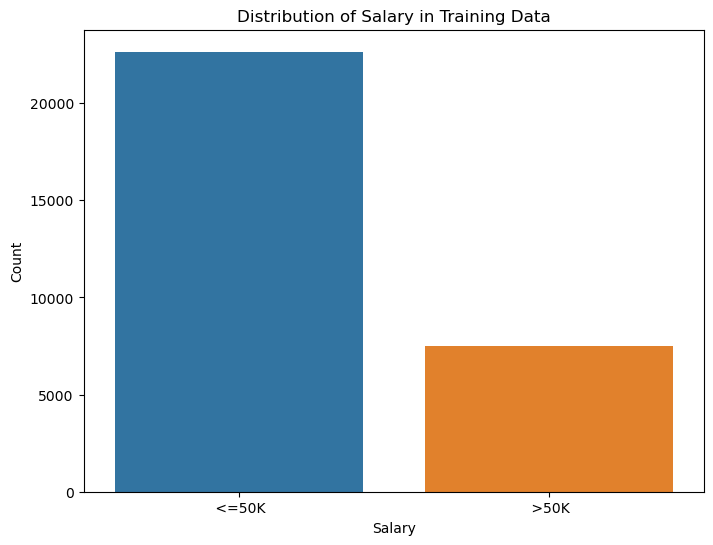

In [7]:
# Visualizing the distribution of the 'Salary' variable

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=train_data)
plt.title('Distribution of Salary in Training Data')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

# No. of people are more with salary range <=50K than No. of people with salary range >50K

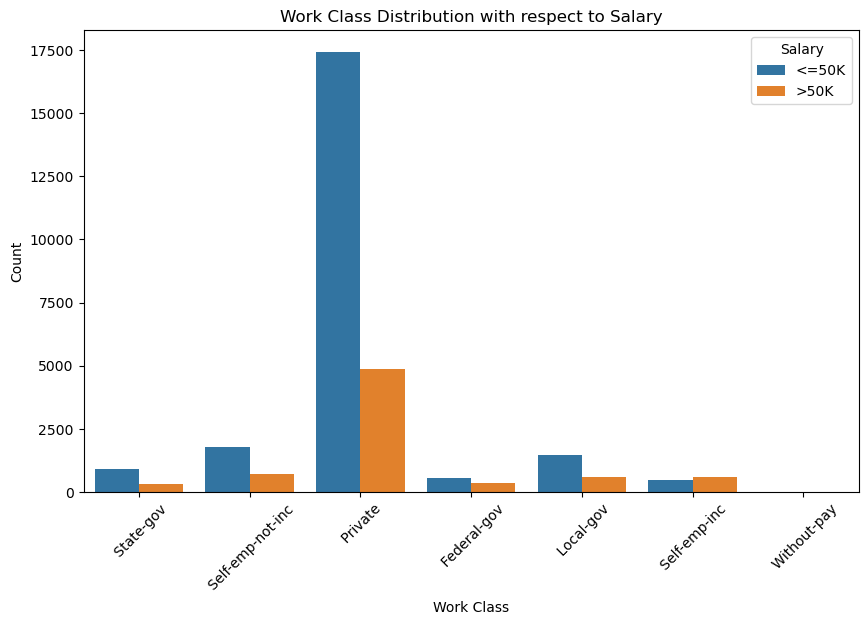

In [8]:
# Bar plot showing the distribution of 'workclass' with respect to 'Salary'
plt.figure(figsize=(10, 6))
sns.countplot(x='workclass', hue='Salary', data=train_data)
plt.title('Work Class Distribution with respect to Salary')
plt.xlabel('Work Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

# Employees in private companies are far more than other workclass types for both salary types

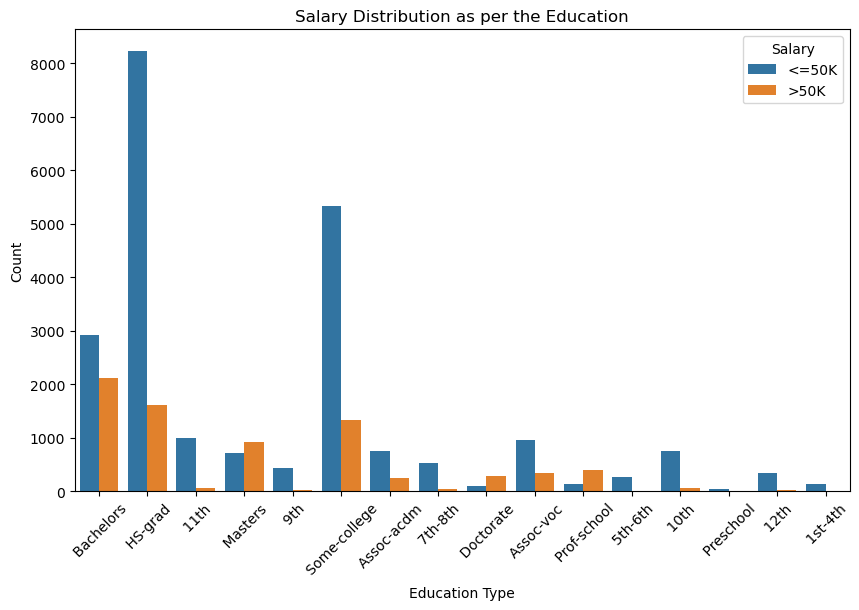

In [11]:
# Bar plot showing the distribution of 'workclass' with respect to 'Salary'
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='Salary', data=train_data)
plt.title('Salary Distribution as per the Education')
plt.xlabel('Education Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Salary', loc='upper right', labels=['<=50K', '>50K'])
plt.show()

# No. of People are more who have done Masters,doctorate or Prof-school and are earning >50K. This shows more the education more is the salary.

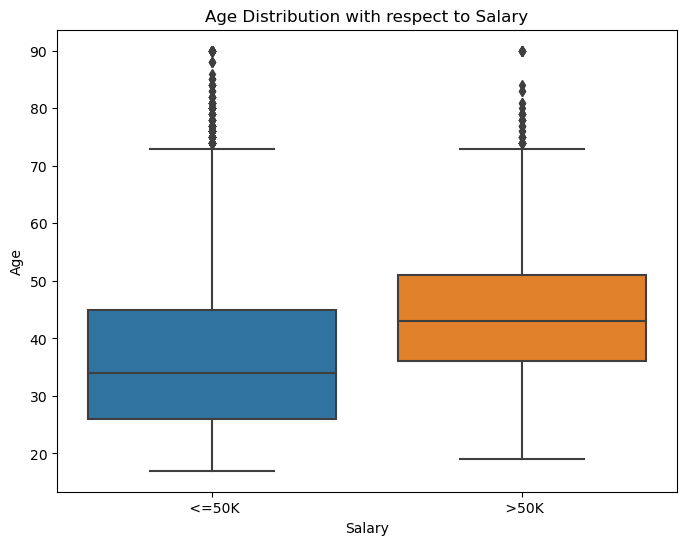

In [9]:
# Box plot showing the distribution of 'age' with respect to 'Salary'
plt.figure(figsize=(8, 6))
sns.boxplot(x='Salary', y='age', data=train_data)
plt.title('Age Distribution with respect to Salary')
plt.xlabel('Salary')
plt.ylabel('Age')
plt.show()

# There are many outliers in age for both salary ranges from above graph.

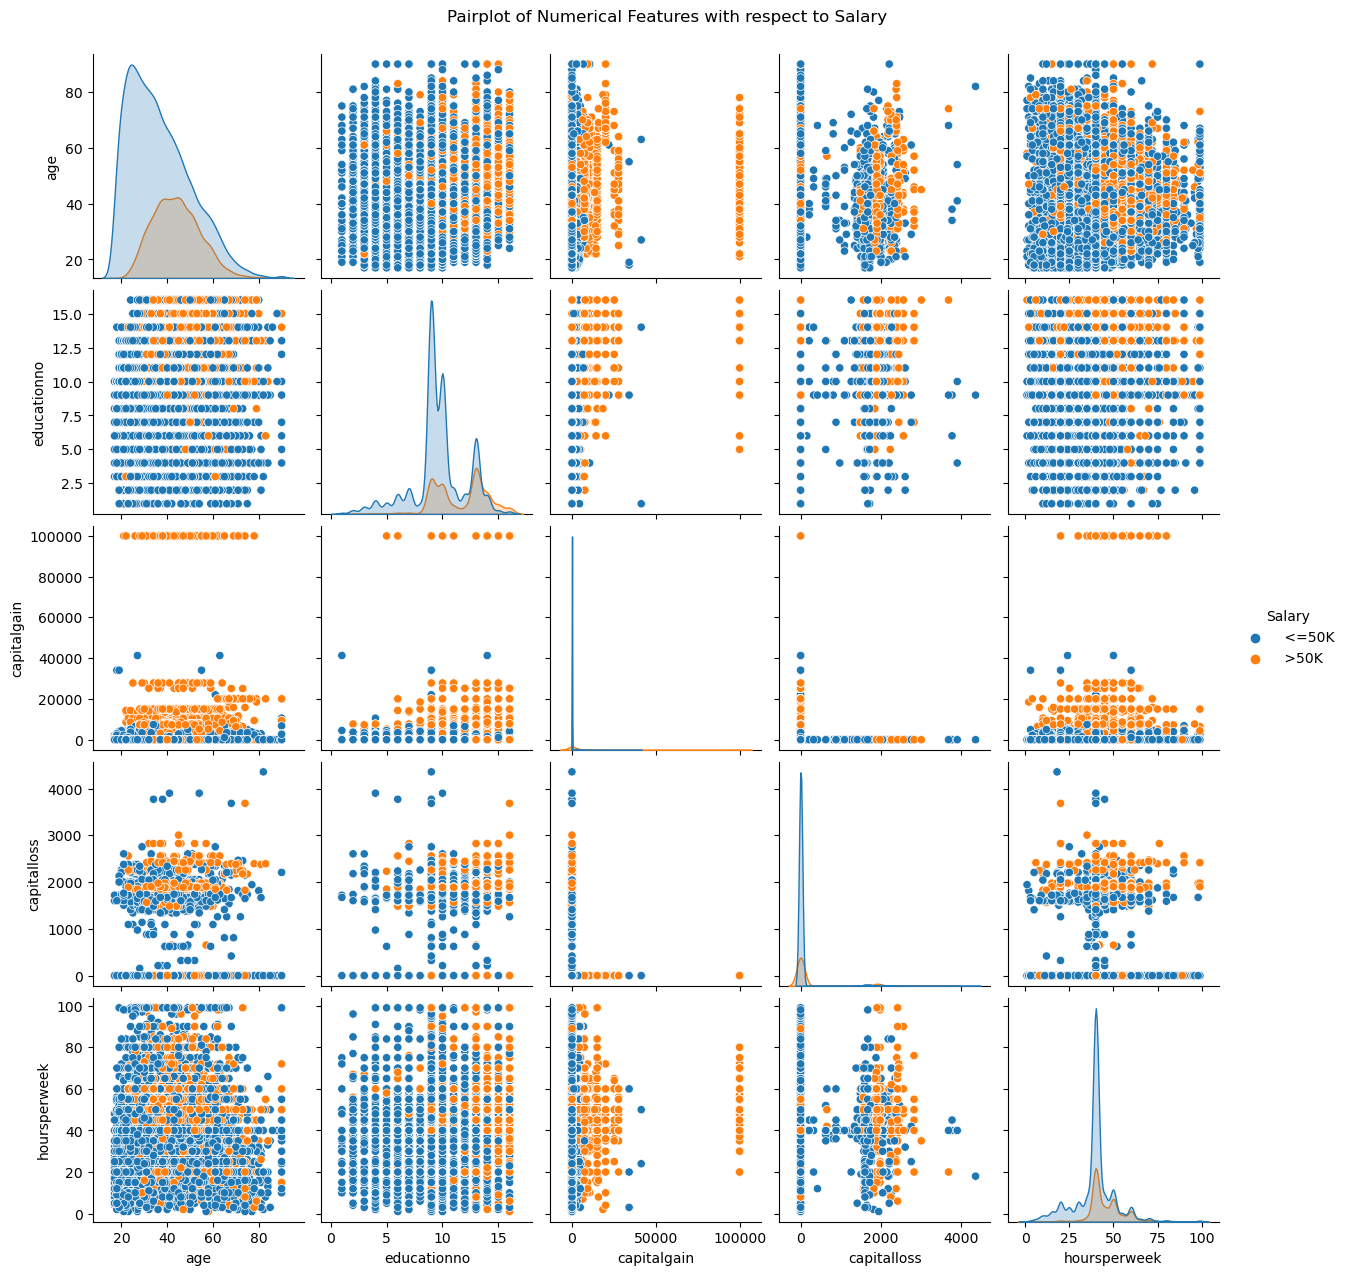

In [10]:
# Pairplot to visualize the relationships between numerical features
sns.pairplot(train_data, hue='Salary', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features with respect to Salary', y=1.02)
plt.show()

# From the above pairplot we can see that person with age between 30 to 65 and working 50 to 80 hoursperweek is earning more than 50K

In [6]:
# Define input features and target variable for training data
X_train = train_data.drop('Salary', axis=1)
y_train = train_data['Salary']

In [7]:
# Define input features and target variable for test data
X_test = test_data.drop('Salary', axis=1)
y_test = test_data['Salary']

In [8]:
# Convert categorical variables to numerical using one-hot encoding
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [9]:
# Handle any mismatch in columns between training and test data due to categorical values
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

In [10]:
# Build the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [11]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [12]:
# Calculate accuracy and display confusion matrix
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

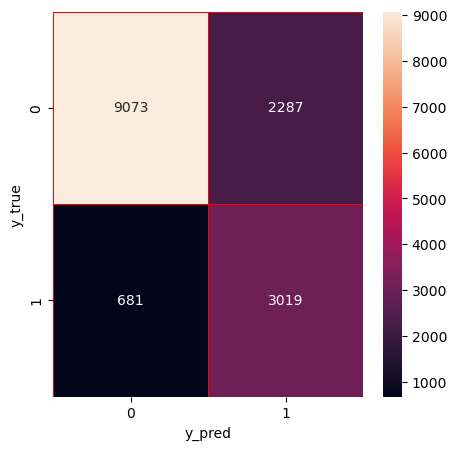

In [13]:
# confusion matrix vizualization
import matplotlib.pyplot as plt
import seaborn as sns 
f, ax =plt.subplots(figsize = (5,5))

sns.heatmap(confusion_mat,annot = True, linewidths= 0.5, linecolor="red", fmt=".0f", ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.show()

In [14]:
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.8029216467463479
Confusion Matrix:
 [[9073 2287]
 [ 681 3019]]


# Naive Bayes is a simple yet effective classification algorithm that provides probabilistic predictions based on the observed features and their conditional probabilities given the class labels.
# From above
# The accuracy of 0.8029 indicates that the Naive Bayes classifier correctly classified approximately 80.29% of the instances in the dataset.
# The confusion matrix provides following predictions:

# True Positives (TP): 3019 instances were correctly predicted as positive for the relevant class.
# True Negatives (TN): 9073 instances were correctly predicted as negative for the relevant class.
# False Positives (FP): 2287 instances were incorrectly predicted as positive (Type I error) for the relevant class.
# False Negatives (FN): 681 instances were incorrectly predicted as negative (Type II error) for the relevant class.

In [13]:
# Numerical features for visualization (assuming numeric columns except 'Salary')
numerical_features = ['age', 'capitalgain', 'capitalloss', 'hoursperweek']

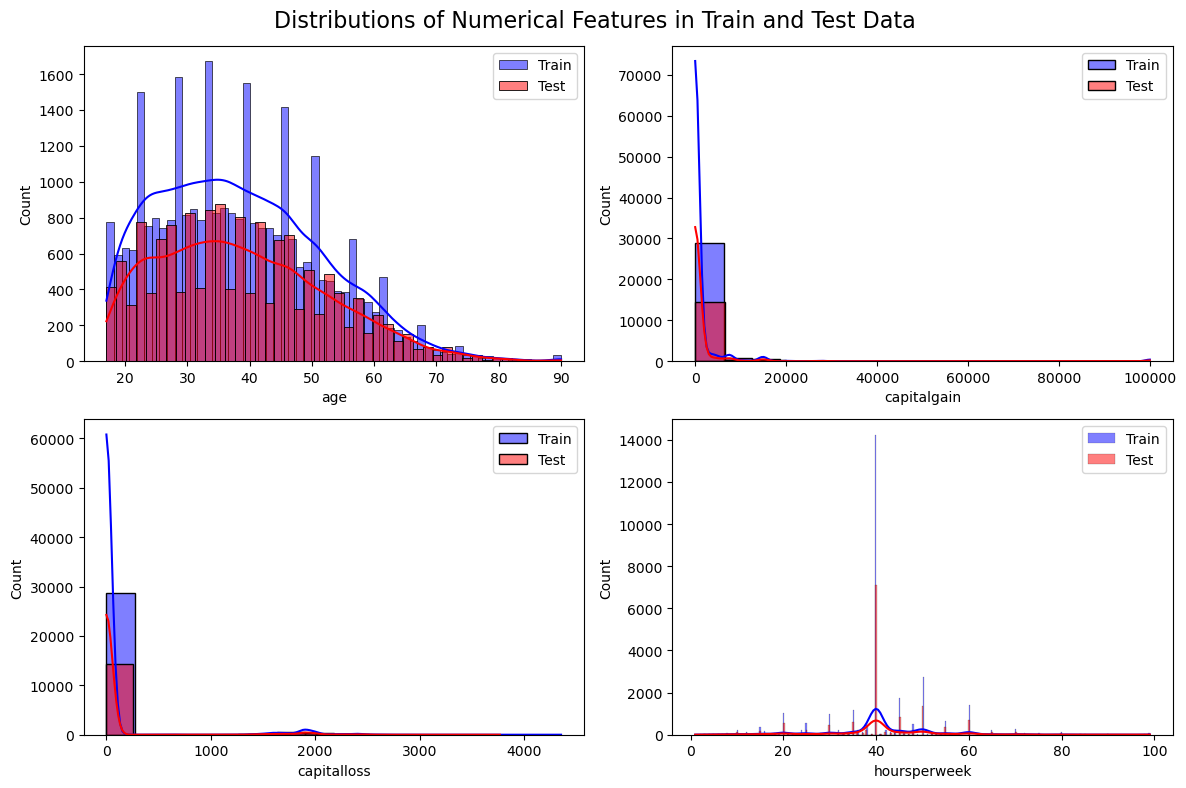

In [14]:
# Compare feature distributions between training and test data using histograms
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.histplot(train_data[feature], label='Train', kde=True, color='blue')
    sns.histplot(test_data[feature], label='Test', kde=True, color='red')
    plt.xlabel(feature)
    plt.legend()
plt.suptitle('Distributions of Numerical Features in Train and Test Data', fontsize=16)
plt.tight_layout()
plt.show()

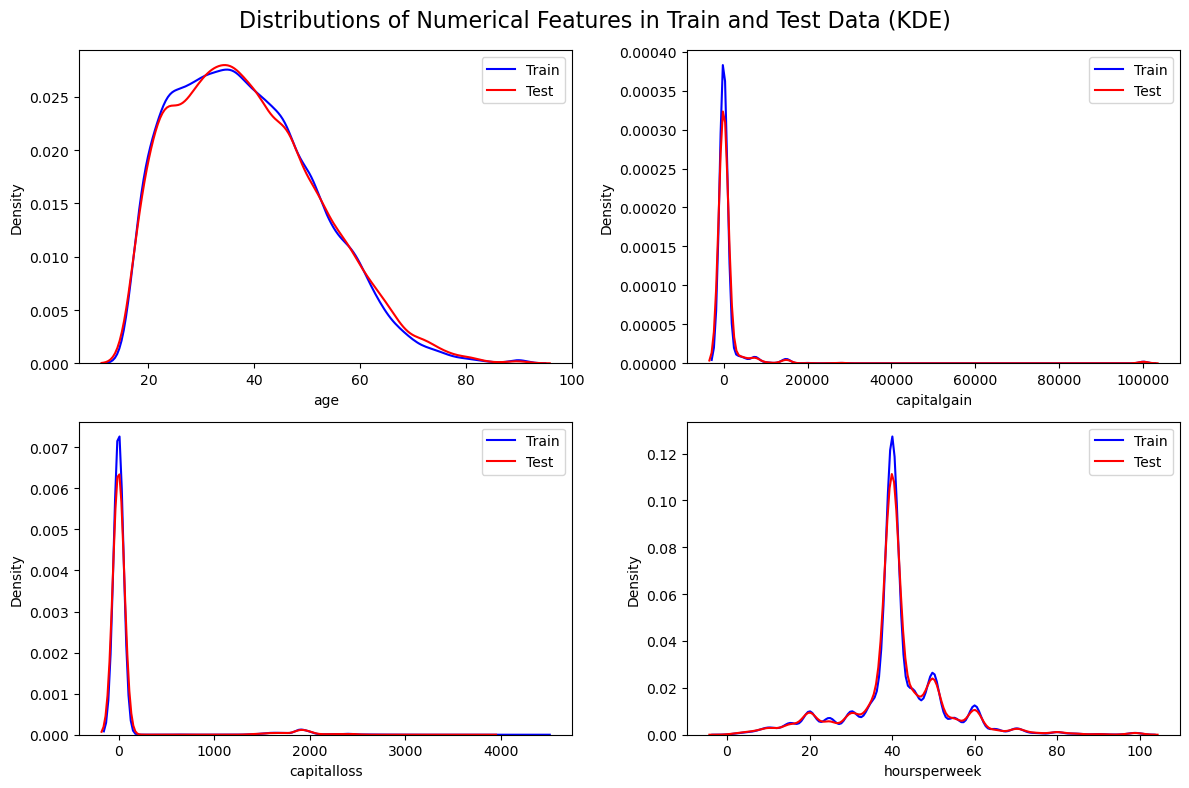

In [15]:
# We can use KDE (Kernel Density Estimation) plots for a smoother view
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.kdeplot(train_data[feature], label='Train', color='blue')
    sns.kdeplot(test_data[feature], label='Test', color='red')
    plt.xlabel(feature)
    plt.legend()
plt.suptitle('Distributions of Numerical Features in Train and Test Data (KDE)', fontsize=16)
plt.tight_layout()
plt.show()

# As the shapes of the distributions are similar, it indicates that the test data is representative of the training data.